In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
    
import provid

In [3]:
from provid.source import download_all

In [5]:
srcs = download_all()

In [6]:
for name, src in srcs.items():
    src.parse()

/Users/dsuo/miniconda3/envs/provid/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


# National aggregate data

In [7]:
srcs["county_case"].df

,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,942,965,974,974,1002,1015,1030,1052,1066,1073
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,2708,2770,2835,2835,3028,3101,3142,3223,3265,3320
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,562,569,575,575,585,598,602,610,612,614
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,324,334,337,338,352,363,368,372,382,389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,215,221,228,234,237,240,242,247,250,251
3191,56039,Teton County,WY,56,0,0,0,0,0,0,...,279,292,311,318,331,335,348,354,358,362
3192,56041,Uinta County,WY,56,0,0,0,0,0,0,...,233,235,243,245,247,254,259,262,265,267
3193,56043,Washakie County,WY,56,0,0,0,0,0,0,...,45,45,45,45,46,48,49,49,49,54


# National patient data

In [8]:
srcs["national_patient"].df

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/07/03,NaN,NaN,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",Missing,Missing,Missing,Missing
1,2020/05/27,NaN,NaN,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",No,Missing,No,Missing
2,2020/06/06,NaN,NaN,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",Missing,Missing,Missing,Missing
3,2020/06/28,NaN,NaN,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",Missing,Missing,Missing,Missing
4,2020/07/06,NaN,NaN,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",Missing,Missing,Missing,Missing
...,...,...,...,...,...,...,...,...,...,...,...
2668170,2020/03/18,2020/03/18,NaN,Laboratory-confirmed case,Male,60 - 69 Years,Unknown,Yes,Unknown,Unknown,Yes
2668171,2020/05/20,2020/03/18,NaN,Laboratory-confirmed case,Male,60 - 69 Years,Unknown,Missing,Missing,No,Missing
2668172,2020/04/02,2020/03/18,2020/03/15,Laboratory-confirmed case,Male,60 - 69 Years,Unknown,No,Missing,No,Missing
2668173,2020/03/25,2020/03/18,NaN,Laboratory-confirmed case,Male,60 - 69 Years,Unknown,Unknown,Unknown,Unknown,Yes


## Cases by age

In [9]:
srcs["national_patient"].df.age_group.value_counts(normalize=True) * 100

20 - 29 Years    17.558264
30 - 39 Years    16.889847
40 - 49 Years    16.059329
50 - 59 Years    16.036354
60 - 69 Years    11.530628
80+ Years         6.651152
70 - 79 Years     6.578291
10 - 19 Years     6.047463
0 - 9 Years       2.537392
Unknown           0.111278
Name: age_group, dtype: float64

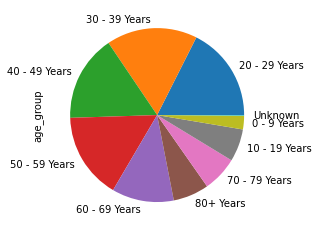

In [10]:
srcs["national_patient"].df.age_group.value_counts(normalize=True).plot.pie()

In [11]:
srcs["national_patient"].df.age_group.value_counts(normalize=True) * 100

20 - 29 Years    17.558264
30 - 39 Years    16.889847
40 - 49 Years    16.059329
50 - 59 Years    16.036354
60 - 69 Years    11.530628
80+ Years         6.651152
70 - 79 Years     6.578291
10 - 19 Years     6.047463
0 - 9 Years       2.537392
Unknown           0.111278
Name: age_group, dtype: float64

## Deaths by age

In [12]:
srcs["national_patient"].df[srcs["national_patient"].df.death_yn == "Yes"].age_group.value_counts(normalize=True) * 100

80+ Years        45.990406
70 - 79 Years    24.250161
60 - 69 Years    16.767234
50 - 59 Years     8.119020
40 - 49 Years     3.108021
30 - 39 Years     1.237731
20 - 29 Years     0.439964
10 - 19 Years     0.047707
0 - 9 Years       0.029154
Unknown           0.010602
Name: age_group, dtype: float64

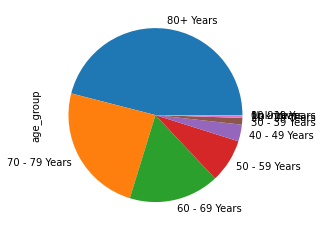

In [13]:
srcs["national_patient"].df[srcs["national_patient"].df.death_yn == "Yes"].age_group.value_counts(normalize=True).plot.pie()

# County data

In [14]:
# Mercer, NJ
code = "021"

In [15]:
srcs["county_case"].df

,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,942,965,974,974,1002,1015,1030,1052,1066,1073
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,2708,2770,2835,2835,3028,3101,3142,3223,3265,3320
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,562,569,575,575,585,598,602,610,612,614
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,324,334,337,338,352,363,368,372,382,389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,215,221,228,234,237,240,242,247,250,251
3191,56039,Teton County,WY,56,0,0,0,0,0,0,...,279,292,311,318,331,335,348,354,358,362
3192,56041,Uinta County,WY,56,0,0,0,0,0,0,...,233,235,243,245,247,254,259,262,265,267
3193,56043,Washakie County,WY,56,0,0,0,0,0,0,...,45,45,45,45,46,48,49,49,49,54


In [16]:
cases = srcs["county_case"].df[srcs["county_case"].df.countyFIPS == 34021]
deaths = srcs["county_death"].df[srcs["county_death"].df.countyFIPS == 34021]

In [17]:
cases = cases.drop(labels=["countyFIPS", "County Name", "State", "stateFIPS"], axis=1)
deaths = deaths.drop(labels=["countyFIPS", "County Name", "State", "stateFIPS"], axis=1)

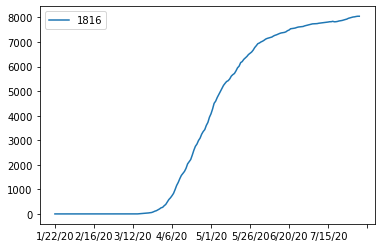

In [18]:
cases.T.plot()

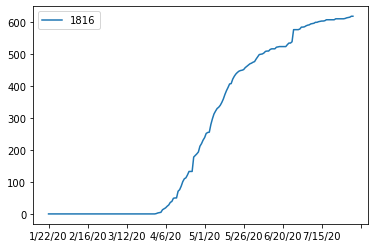

In [19]:
deaths.T.plot()

# Princeton data

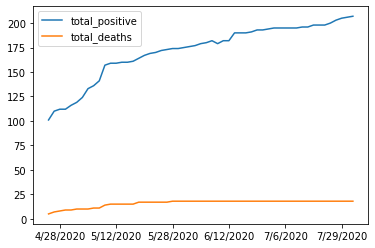

In [20]:
srcs["princeton"].df[["total_positive", "total_deaths"]].iloc[::-1].plot()

In [148]:
deaths = {
    "local": srcs["princeton"].df.total_deaths.iloc[::-1].rename("local"),
    "county": srcs["county_death"].df[srcs["county_death"].df.countyFIPS == 34021].drop(columns=["countyFIPS", "County Name", "State", "stateFIPS"]).T.iloc[:, 0].rename("county"),
    "state": srcs["county_death"].df[srcs["county_death"].df.State == "NJ"].drop(columns=["countyFIPS", "County Name", "State", "stateFIPS"]).sum(axis=0).rename("state"),
    "national": srcs["county_death"].df.drop(columns=["countyFIPS", "County Name", "State", "stateFIPS"]).sum(axis=0).rename("national")
}
    

In [149]:
deaths_table = None
for geo in ["local", "county", "state", "national"]:
    deaths[geo].index = pd.to_datetime(deaths[geo].index)
    if geo == "local":
        deaths_table = pd.DataFrame(deaths[geo])
    else:
        deaths_table = pd.merge(deaths_table, deaths[geo], how="outer", left_index=True, right_index=True)

for geo in ["local", "county", "state", "national"]:
    deaths_table[geo].iloc[:np.argmin(deaths_table[geo])] = 0
    
deaths_table = deaths_table.interpolate(method="time", limit_direction="both")

/Users/dsuo/miniconda3/envs/provid/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


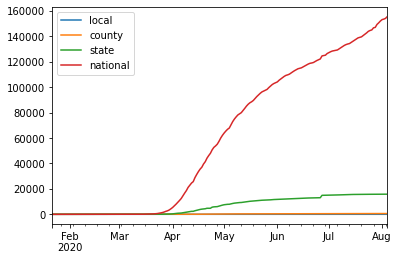

In [150]:
deaths_table.plot()

In [84]:
cases = {
    "local": srcs["princeton"].df.total_positive.iloc[::-1].rename("local"),
    "county": srcs["county_case"].df[srcs["county_case"].df.countyFIPS == 34021].drop(columns=["countyFIPS", "County Name", "State", "stateFIPS"]).T.iloc[:, 0].rename("county"),
    "state": srcs["county_case"].df[srcs["county_case"].df.State == "NJ"].drop(columns=["countyFIPS", "County Name", "State", "stateFIPS"]).sum(axis=0).rename("state"),
    "national": srcs["county_case"].df.drop(columns=["countyFIPS", "County Name", "State", "stateFIPS"]).sum(axis=0).rename("national")
}
    

In [151]:
cases_table = None
for geo in ["local", "county", "state", "national"]:
    cases[geo].index = pd.to_datetime(cases[geo].index)
    if geo == "local":
        cases_table = cases[geo]
    else:
        cases_table = pd.merge(cases_table, cases[geo], how="outer", left_index=True, right_index=True)
        
for geo in ["local", "county", "state", "national"]:
    cases_table[geo].iloc[:np.argmin(cases_table[geo])] = 0
    
cases_table = cases_table.interpolate(method="time", limit_direction="both")

/Users/dsuo/miniconda3/envs/provid/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


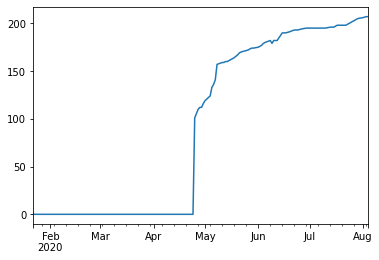

In [152]:
cases_table.local.plot()